In [1]:
import tensorflow as tf

In [2]:
from keras.layers import Dense, Dropout, InputLayer
from keras import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
import numpy as np
import seaborn as sb
import pandas as pd

In [5]:
eeg_dataset_path = './Dataset/EEG_data.csv'
demo_dataset_path = './Dataset/demographic_info.csv'

In [6]:
eeg_dataset = pd.read_csv(eeg_dataset_path)
demo_dataset = pd.read_csv(demo_dataset_path)

In [7]:
eeg_dataset.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


<Axes: >

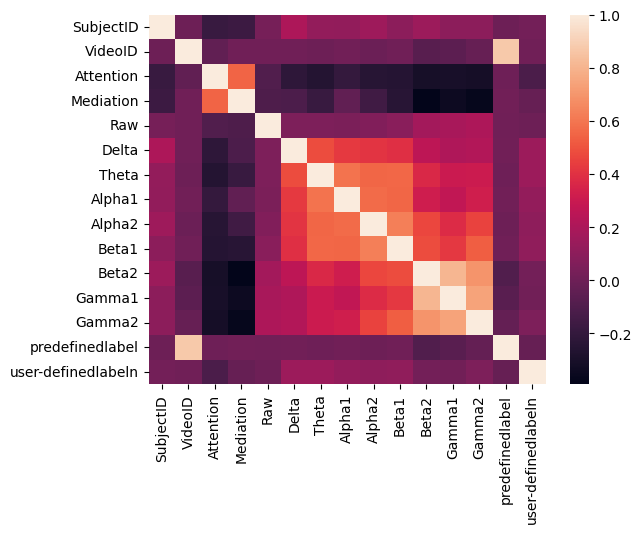

In [8]:
sb.heatmap(eeg_dataset.corr())

The correlation matrix shows that from 'Beta2' to 'Gamma2' values are highly regular (> 0.6) correlated. And from 'Delta' to 'Beta1', there is semi-correlation. They may/may not be dropped. There was no major performance difference.

In [9]:
#eeg_dataset.drop(['predefinedlabel', 'VideoID', 'Beta2', 'Gamma2', 'Alpha1', 'Delta', 'Mediation'], axis=1, inplace=True)
eeg_dataset.drop(['predefinedlabel', 'VideoID'], axis=1, inplace=True)

In [10]:
eeg_dataset.head()

,SubjectID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0


In [11]:
demo_dataset.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [12]:
demo_dataset.columns

Index(['subject ID', ' age', ' ethnicity', ' gender'], dtype='object')

In [13]:
demo_dataset.rename({'subject ID': 'SubjectID', ' age': 'age', ' ethnicity': 'ethnicity', ' gender': 'gender'}, inplace=True, axis=1)

In [14]:
demo_dataset.drop('ethnicity', axis=1, inplace=True)

In [15]:
demo_dataset['gender'] = np.where(demo_dataset['gender'] == 'M', 0, 1)

In [16]:
demo_dataset.head()

,SubjectID,age,gender
0,0,25,0
1,1,24,0
2,2,31,0
3,3,28,1
4,4,24,0


In [17]:
data = pd.merge(eeg_dataset, demo_dataset, on='SubjectID', how='inner')

In [18]:
data.head()

,SubjectID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln,age,gender
0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,25,0
1,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,25,0
2,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,25,0
3,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,25,0
4,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,25,0


In [19]:
data.drop('SubjectID', axis=1, inplace=True)

In [20]:
data.rename({'user-definedlabeln': 'Confusion'}, axis=1, inplace=True)

In [21]:
data['Confusion'].value_counts()

Confusion
1.0    6567
0.0    6244
Name: count, dtype: int64

In [22]:
data.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Confusion,age,gender
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,25,0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,25,0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,25,0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,25,0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,25,0


<Axes: >

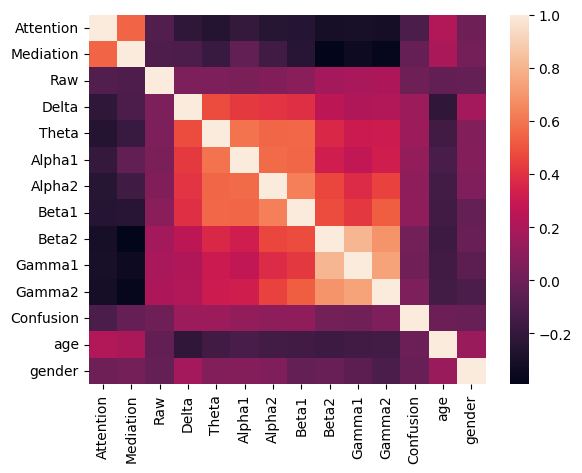

In [23]:
sb.heatmap(data.corr())

In [24]:
data_y = data.pop('Confusion').to_numpy()

In [44]:
sc = StandardScaler()
data_x = sc.fit_transform(data)
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=42, shuffle=True)

In [26]:
x_train[:5]

array([[-1.05018222e+00,  3.00918862e-01, -1.39774346e-01,
         1.46323349e+00,  7.55344049e-01,  4.14013500e+00,
         2.55618940e-01,  1.76079996e-01,  2.95962441e-01,
         2.84383896e-01, -2.09302587e-01, -6.39419831e-01,
        -5.01560675e-01],
       [ 1.06626107e+00,  6.98180549e-01,  1.07530778e-02,
        -9.35110570e-01, -6.51099134e-01, -3.82412260e-01,
        -1.14306030e-01, -2.52340450e-01, -1.69729650e-01,
        -2.52314363e-01, -7.72599888e-02,  2.53509449e+00,
        -5.01560675e-01],
       [-1.78445846e+00, -2.08265126e+00,  3.31399376e+00,
        -2.84651252e-01, -1.12944591e-01,  2.49111563e-01,
         9.52613077e-01, -4.51394168e-02,  4.70497969e+00,
         2.57765054e+00,  2.94934063e+00, -6.39419831e-01,
        -5.01560675e-01],
       [-1.78445846e+00, -2.08265126e+00,  6.17880352e-01,
        -2.81588197e-01,  1.29738420e-01, -2.05629771e-01,
        -2.71701207e-01, -2.52470732e-01, -3.52267694e-01,
        -2.43444767e-01, -2.36582510e

In [27]:
y_train[:5]

array([1., 1., 0., 1., 1.])

ANN

In [ ]:
model = Sequential([
    InputLayer(x_train.shape[1]),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.22),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [29]:
model.compile(
    optimizer='adam', loss='binary_crossentropy', metrics='accuracy'
)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [31]:
model_checkpoint = ModelCheckpoint('./Model_Data/Model_test.h5', save_best_only=True, monitor='val_accuracy')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, restore_best_weights=True)

In [32]:
history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test), callbacks=[model_checkpoint, early_stopping])

Epoch 1/200
301/301 [==============================] - 2s 4ms/step - loss: 0.6691 - accuracy: 0.5915 - val_loss: 0.6496 - val_accuracy: 0.6138
Epoch 2/200
301/301 [==============================] - 1s 4ms/step - loss: 0.6543 - accuracy: 0.6151 - val_loss: 0.6424 - val_accuracy: 0.6225
Epoch 3/200
301/301 [==============================] - 1s 3ms/step - loss: 0.6469 - accuracy: 0.6199 - val_loss: 0.6362 - val_accuracy: 0.6316
Epoch 4/200
301/301 [==============================] - 1s 3ms/step - loss: 0.6418 - accuracy: 0.6298 - val_loss: 0.6302 - val_accuracy: 0.6397
Epoch 5/200
301/301 [==============================] - 1s 3ms/step - loss: 0.6368 - accuracy: 0.6360 - val_loss: 0.6335 - val_accuracy: 0.6385
Epoch 6/200
301/301 [==============================] - 1s 4ms/step - loss: 0.6349 - accuracy: 0.6367 - val_loss: 0.6261 - val_accuracy: 0.6541
Epoch 7/200
301/301 [==============================] - 1s 4ms/step - loss: 0.6293 - accuracy: 0.6408 - val_loss: 0.6291 - val_accuracy: 0.6428

In [33]:
final = pd.DataFrame(history.history)

<Axes: >

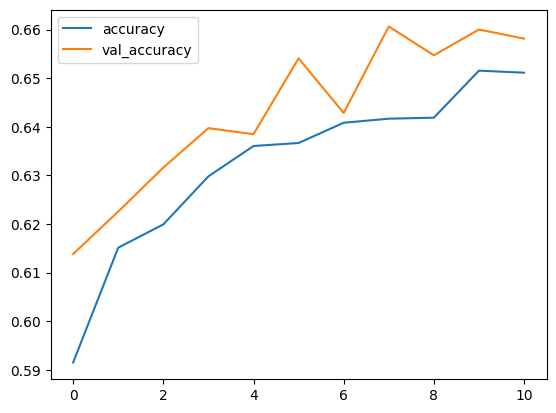

In [34]:
final.loc[:, ['accuracy', 'val_accuracy']].plot()

<Axes: >

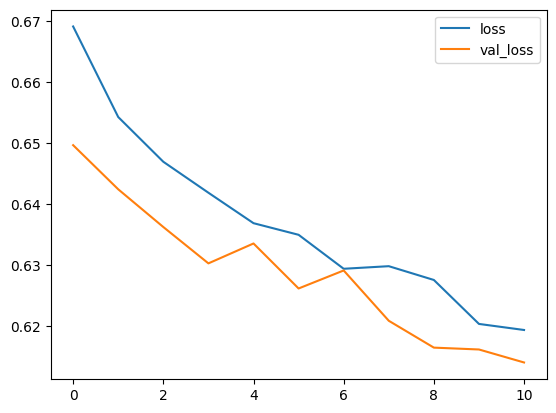

In [35]:
final.loc[:, ['loss', 'val_loss']].plot()

Bidirectional LSTMs

In [45]:
from keras.layers import LSTM, Bidirectional

In [52]:
_x_train, _x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

In [57]:
_x_train.shape

(9608, 13, 1)

1) Bi-LSTM with 13 time steps and 1 feature

In [69]:
_model = Sequential([
    InputLayer((_x_train.shape[1], _x_train.shape[2])),
    Bidirectional(LSTM(20, return_sequences=True)),
    Bidirectional(LSTM(10)),
    Dense(1, activation='sigmoid')
])

In [70]:
_model.compile(
    optimizer='adam', loss='binary_crossentropy', metrics='accuracy'
)

In [61]:
_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 13, 40)           3520      
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 20)               4080      
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 7,621
Trainable params: 7,621
Non-trainable params: 0
_________________________________________________________________


In [62]:
_model_checkpoint = ModelCheckpoint('./Model_Data/Model_test_blstm.h5', save_best_only=True, monitor='val_accuracy')
_history = _model.fit(_x_train, y_train, epochs=200, batch_size=32, validation_data=(_x_test, y_test), callbacks=[_model_checkpoint, early_stopping])

Epoch 1/200
301/301 [==============================] - 9s 15ms/step - loss: 0.6795 - accuracy: 0.5768 - val_loss: 0.6704 - val_accuracy: 0.5988
Epoch 2/200
301/301 [==============================] - 4s 13ms/step - loss: 0.6610 - accuracy: 0.6117 - val_loss: 0.6548 - val_accuracy: 0.6072
Epoch 3/200
301/301 [==============================] - 4s 14ms/step - loss: 0.6496 - accuracy: 0.6251 - val_loss: 0.6484 - val_accuracy: 0.6154
Epoch 4/200
301/301 [==============================] - 4s 13ms/step - loss: 0.6420 - accuracy: 0.6333 - val_loss: 0.6486 - val_accuracy: 0.6275
Epoch 5/200
301/301 [==============================] - 4s 14ms/step - loss: 0.6405 - accuracy: 0.6295 - val_loss: 0.6399 - val_accuracy: 0.6294
Epoch 6/200
301/301 [==============================] - 4s 13ms/step - loss: 0.6365 - accuracy: 0.6346 - val_loss: 0.6390 - val_accuracy: 0.6310
Epoch 7/200
301/301 [==============================] - 4s 14ms/step - loss: 0.6336 - accuracy: 0.6436 - val_loss: 0.6355 - val_accuracy:

In [63]:
_final = pd.DataFrame(_history.history)

<Axes: >

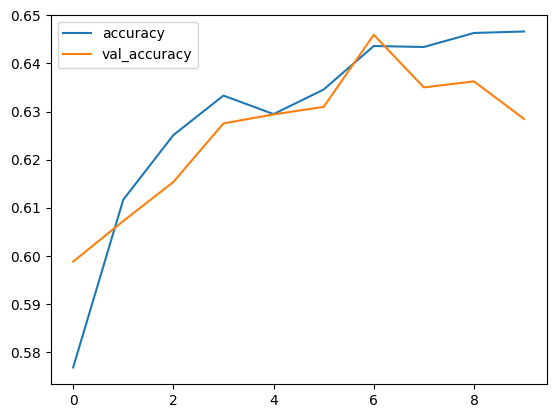

In [64]:
_final.loc[:, ['accuracy', 'val_accuracy']].plot()

<Axes: >

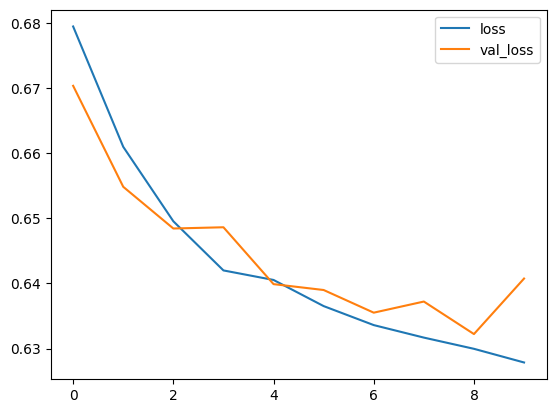

In [65]:
_final.loc[:, ['loss', 'val_loss']].plot()

2) Bi-LSTM with 1 time step and 13 features

In [66]:
_x_train, _x_test = np.expand_dims(x_train, 1), np.expand_dims(x_test, 1)
_x_train.shape

(9608, 1, 13)

In [71]:
_modelcheckpoint = ModelCheckpoint('./Model_Data/Model_test.h5', save_best_only=True, monitor='val_accuracy')
_xhistory = _model.fit(_x_train, y_train, epochs=200, batch_size=32, validation_data=(_x_test, y_test), callbacks=[_modelcheckpoint, early_stopping])

Epoch 1/200
301/301 [==============================] - 8s 16ms/step - loss: 0.6713 - accuracy: 0.5938 - val_loss: 0.6586 - val_accuracy: 0.6085
Epoch 2/200
301/301 [==============================] - 4s 12ms/step - loss: 0.6516 - accuracy: 0.6115 - val_loss: 0.6499 - val_accuracy: 0.6169
Epoch 3/200
301/301 [==============================] - 4s 13ms/step - loss: 0.6429 - accuracy: 0.6252 - val_loss: 0.6422 - val_accuracy: 0.6229
Epoch 4/200
301/301 [==============================] - 4s 12ms/step - loss: 0.6359 - accuracy: 0.6387 - val_loss: 0.6398 - val_accuracy: 0.6338
Epoch 5/200
301/301 [==============================] - 4s 14ms/step - loss: 0.6311 - accuracy: 0.6396 - val_loss: 0.6333 - val_accuracy: 0.6397
Epoch 6/200
301/301 [==============================] - 4s 13ms/step - loss: 0.6268 - accuracy: 0.6454 - val_loss: 0.6288 - val_accuracy: 0.6372
Epoch 7/200
301/301 [==============================] - 4s 14ms/step - loss: 0.6210 - accuracy: 0.6531 - val_loss: 0.6299 - val_accuracy:

In [72]:
_xfinal = pd.DataFrame(_xhistory.history)

<Axes: >

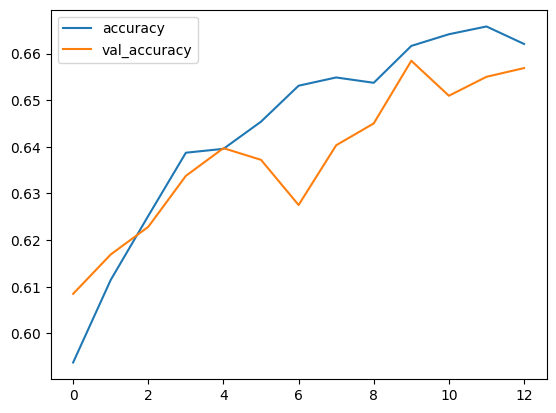

In [73]:
_xfinal.loc[:, ['accuracy', 'val_accuracy']].plot()

<Axes: >

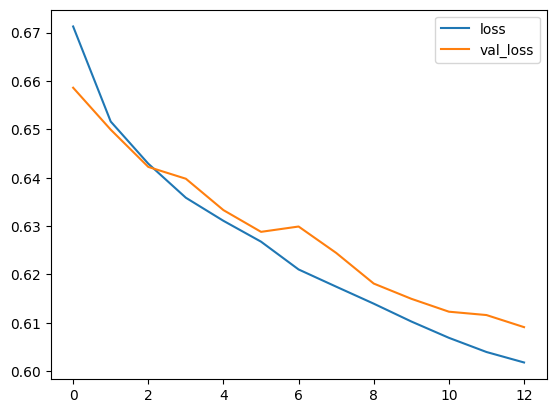

In [74]:
_xfinal.loc[:, ['loss', 'val_loss']].plot()

REMARKS: Both the Bi-LSTMs (irrespective of shape) show overfit curve (model cannot be used for deployment purposes)

Machine learning algorithms like SVM, Decision Trees and Random Forest cannot be used as the final estimation is to get a rough value of the outcome (from 0 to 1) [which can be converted to percentage (* 100)] and not a definite binary value (0 and 1).

Overall REMARK:
The EEG dataset is tricky and really hard to predict precise values. The following graphs indicates that the data collected from EEG is highly left inclined, which makes it harder for prediction.

The overall accuracy achieved is 0.66 and loss is 0.64.

<Axes: ylabel='Frequency'>

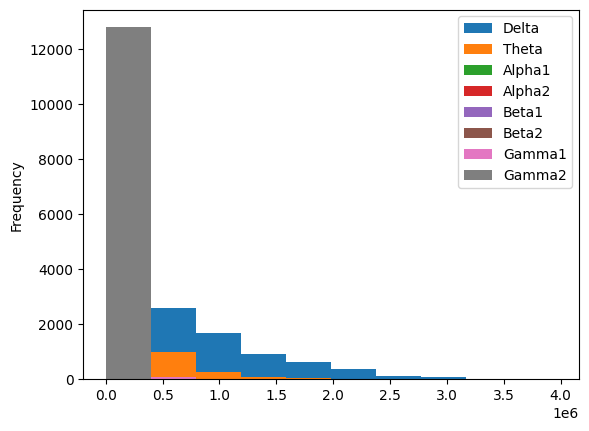

In [79]:
eeg_dataset.loc[:, 'Delta':'Gamma2'].plot(kind='hist')